# Main Script

In [2]:
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import*
from IPython.display import FileLink

In [4]:
path = Path('../data/Otters')
path.mkdir(parents=True, exist_ok=True)

In [5]:
Path('../functions').mkdir(parents=True, exist_ok = True)

In [8]:
!cp ../input/ottertext/* {path}/
!cp ../input/functions/* ../functions/

In [9]:
%run "../functions/functions"

## Define Classes and Download Images

In [10]:
classes = ['sea','river']

In [11]:
path = Path('../data/Otters')

In [12]:
downloadImages(path, "sea", "urls_sea.txt", 500)

In [13]:
downloadImages(path, "river", "urls_river.txt", 500)

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size = 500)

## View Data

In [30]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct = 0.2,
                                 ds_tfms = get_transforms(), size = 64, num_workers=0).normalize(imagenet_stats)

In [31]:
data.classes

['river', 'sea']

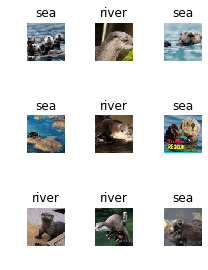

In [32]:
data.show_batch(rows = 3, figsize = (3, 4))

In [18]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 37.4MB/s]


In [19]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [21]:
lr = 3e-4

In [22]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.202800,0.444492,0.173611,00:06
1,0.980726,0.388332,0.131944,00:05
2,0.808526,0.481543,0.159722,00:05
3,0.716456,0.521864,0.159722,00:05
4,0.671460,0.546601,0.166667,00:05


In [23]:
learn.save('stage-1',return_path = True)

PosixPath('../data/Otters/models/stage-1.pth')

In [24]:
learn.export('../../working/cnnStage1.pkl')
FileLink(r'cnnStage1.pkl')

/kaggle/working/cnnStage1.pkl

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [29]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.455477,0.509293,0.187500,00:05
1,0.410872,0.529716,0.187500,00:05
2,0.394120,0.520400,0.180556,00:05
3,0.401837,0.500388,0.166667,00:05
4,0.370298,0.490497,0.152778,00:05


In [37]:
learn.save('stage-2')

In [38]:
learn.export('../../working/cnnStage2.pkl')
FileLink(r'cnnStage2.pkl')

/kaggle/working/cnnStage2.pkl

## Cleaning Up

In [33]:
from fastai.widgets import *

In [34]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)

In [35]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [36]:
ds, idsx = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


## Recreate ImageDataBunch and re-train Model from beginning

In [72]:
data = ImageDataBunch.from_csv(path, folder =".", csv_labels = 'cleaned.csv', valid_pct = 0.2,
                              ds_tfms = get_transforms(), size = 64, num_workers=0).normalize(imagenet_stats)

In [73]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


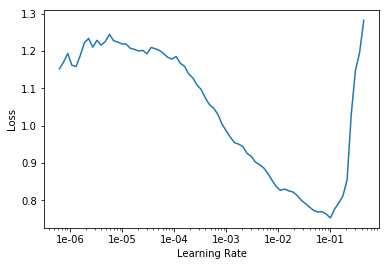

In [74]:
learn.lr_find()
learn.recorder.plot()

In [65]:
lr = 3e-3

In [75]:
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.032473,0.507426,0.144144,00:04
1,0.815888,1.529719,0.198198,00:04
2,0.740815,0.975705,0.126126,00:04
3,0.670350,0.745200,0.117117,00:04
4,0.617248,0.652992,0.135135,00:04


In [76]:
learn.save('stage-1-refined')

In [77]:
learn.export('../../working/cnnStage1Refined.pkl')
FileLink(r'cnnStage1Refined.pkl')

/kaggle/working/cnnStage1Refined.pkl

In [82]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


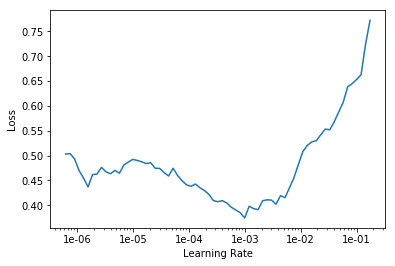

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(5, max_lr = slice(3e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.518149,0.638873,0.171171,00:04
1,0.418843,0.661176,0.135135,00:04
2,0.345511,0.489954,0.117117,00:04
3,0.289735,0.441719,0.135135,00:04
4,0.259843,0.427188,0.126126,00:04


In [85]:
learn.save('stage2-refined')

In [86]:
learn.export('../../working/cnnStage2Refined.pkl')
FileLink(r'cnnStage2Refined.pkl')

/kaggle/working/cnnStage2Refined.pkl

## Go Big

In [87]:
data = data = ImageDataBunch.from_csv(path, folder =".", csv_labels = 'cleaned.csv', valid_pct = 0.2,
                              ds_tfms = get_transforms(), size =128, num_workers=0).normalize(imagenet_stats)

In [88]:
learn.freeze()

In [89]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


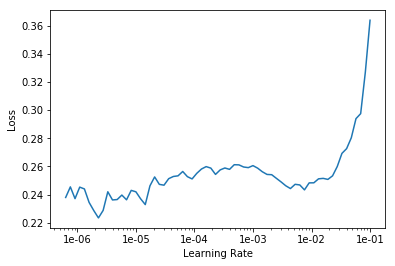

In [58]:
learn.recorder.plot()

In [90]:
lr = 3e-3

In [91]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.115793,0.369912,0.099099,00:04
1,0.151712,0.350707,0.117117,00:04
2,0.181109,0.412616,0.108108,00:04
3,0.182711,0.439767,0.117117,00:04
4,0.185567,0.447166,0.126126,00:04


In [92]:
learn.save('stage1-refined-128')

In [96]:
learn.export('../../working/cnnStage1Refined128.pkl')
FileLink(r'cnnStage1Refined128.pkl')

/kaggle/working/cnnStage1Refined128.pkl

In [93]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


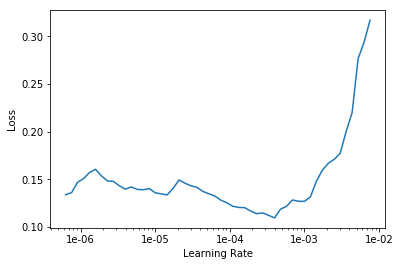

In [94]:
learn.lr_find()
learn.recorder.plot()

In [97]:
learn.fit_one_cycle(5, slice(5e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.184084,0.501852,0.108108,00:04
1,0.174931,0.406739,0.117117,00:04
2,0.152450,0.490791,0.117117,00:04
3,0.154934,0.401653,0.108108,00:04
4,0.136898,0.381487,0.108108,00:04


In [ ]:
learn.save('stage2-refined-128')

In [100]:
learn.export('../../working/cnnStage2Refined128.pkl')
FileLink(r'cnnStage2Refined128.pkl')

/kaggle/working/cnnStage2Refined128.pkl

## Interpretation - Confusion Matrices

In [98]:
interp = ClassificationInterpretation.from_learner(learn)

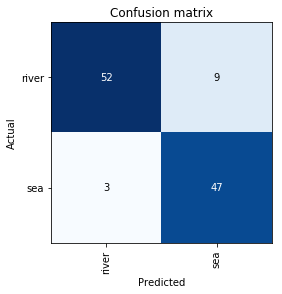

In [99]:
interp.plot_confusion_matrix()